In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [2]:
fulldata= pd.read_csv('molecule_complete.csv')
fulldata= fulldata.drop(columns=['molecule_name', 'atom_atom1_structure', 'type', 'type_scc', 'atom'])
fulldata.columns

Index(['atom_index_0', 'atom_index_1', 'scalar_coupling_constant',
       'potential_energy', 'X', 'Y', 'Z', 'XX_atom1', 'YX_atom1', 'ZX_atom1',
       'XY_atom1', 'YY_atom1', 'ZY_atom1', 'XZ_atom1', 'YZ_atom1', 'ZZ_atom1',
       'XX', 'YX', 'ZX', 'XY', 'YY', 'ZY', 'XZ', 'YZ', 'ZZ',
       'mulliken_charge_atom1', 'mulliken_charge', 'fc', 'sd', 'pso', 'dso',
       'x_atom1_structure', 'y_atom1_structure', 'z_atom1_structure', 'x', 'y',
       'z'],
      dtype='object')

In [3]:
#fulldata.to_csv('NoCatDataSet.csv', index=False)

In [4]:
fulldata

,atom_index_0,atom_index_1,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
0,1,0,84.807600,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,83.022400,0.254579,1.258620,0.272010,0.002150,-0.006031,0.001976,-0.012698,1.085804,0.008001
1,1,2,-11.257000,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,-11.034700,0.352978,2.858390,-3.433600,0.002150,-0.006031,0.001976,1.011731,1.463751,0.000277
2,1,3,-11.254800,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,-11.032500,0.352944,2.858520,-3.433870,0.002150,-0.006031,0.001976,-0.540815,1.447527,-0.876644
3,1,4,-11.254300,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,-11.031900,0.352934,2.858550,-3.433930,0.002150,-0.006031,0.001976,-0.523814,1.437933,0.906397
4,2,0,84.807400,-40.52368,0.0000,0.0000,0.0000,31.5814,1.2173,-4.1474,...,83.022200,0.254585,1.258610,0.272013,1.011731,1.463751,0.000277,-0.012698,1.085804,0.008001
5,2,3,-11.254100,-40.52368,0.0000,0.0000,0.0000,31.5814,1.2173,-4.1474,...,-11.031700,0.352932,2.858560,-3.433950,1.011731,1.463751,0.000277,-0.540815,1.447527,-0.876644
6,2,4,-11.254800,-40.52368,0.0000,0.0000,0.0000,31.5814,1.2173,-4.1474,...,-11.032400,0.352943,2.858530,-3.433870,1.011731,1.463751,0.000277,-0.523814,1.437933,0.906397
7,3,0,84.809300,-40.52368,0.0000,0.0000,0.0000,31.5172,4.1086,1.2723,...,83.024100,0.254634,1.258560,0.272012,-0.540815,1.447527,-0.876644,-0.012698,1.085804,0.008001
8,3,4,-11.254300,-40.52368,0.0000,0.0000,0.0000,31.5172,4.1086,1.2723,...,-11.031900,0.352943,2.858560,-3.433930,-0.540815,1.447527,-0.876644,-0.523814,1.437933,0.906397
9,4,0,84.809500,-40.52368,0.0000,0.0000,0.0000,31.4029,-4.0942,-1.1793,...,83.024300,0.254628,1.258560,0.272012,-0.523814,1.437933,0.906397,-0.012698,1.085804,0.008001


In [5]:
sample= fulldata.sample(frac=0.3, random_state=1, replace=True)
sample

,atom_index_0,atom_index_1,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
4322341,16,4,0.077299,-440.4596,-0.6248,0.5624,0.8068,25.9083,-0.5672,-0.6964,...,0.246801,-0.041499,-0.027993,-0.100010,1.936086,-2.891268,-0.988008,-1.137796,-2.672282,-1.648026
3937352,13,6,2.829150,-403.2739,-2.5814,-0.3160,0.4906,27.3164,5.1626,2.0783,...,2.959300,-0.025151,0.251100,-0.356105,-1.628121,-2.440402,-1.172413,-2.585373,-1.363099,1.862308
491263,11,5,6.262650,-401.0668,-1.4726,-0.5167,1.1734,33.2326,0.7972,-3.5126,...,6.138260,0.020713,-0.060442,0.164120,-0.098320,-0.457306,-0.704858,0.793551,-1.883668,1.575690
4267653,14,0,2.108180,-367.4244,0.3128,-4.1323,0.8236,33.7433,-0.1789,0.1003,...,2.113720,-0.033553,-0.035942,0.063950,0.746029,-0.027162,-2.062367,-0.152529,1.585481,0.011453
1166159,15,5,-1.257380,-366.1838,-0.9027,-0.6058,-1.4183,33.6614,1.4954,2.0998,...,-1.434080,0.155594,0.002281,0.018827,3.984024,-1.457500,1.892063,1.956032,-1.559842,1.096783
2326672,13,5,3.582800,-437.9013,-2.0600,-1.0295,0.3712,27.7516,1.6214,0.8838,...,3.507460,0.058849,0.089288,-0.072799,1.422451,-1.091473,1.618080,-0.865778,-1.008545,1.719358
413825,16,3,2.851850,-386.3286,-1.0336,-0.1894,0.2639,31.5653,-3.3555,-2.6961,...,3.029320,-0.019645,0.179372,-0.337193,0.671394,-0.934612,4.260191,0.664517,-0.577400,1.212433
3063756,11,12,3.390410,-424.4054,1.0433,-1.5417,2.0780,37.4917,-2.5025,-0.9602,...,3.258970,0.083384,0.110329,-0.062276,-1.240481,1.468404,1.049292,-0.777737,-0.724795,-0.004415
1215878,17,2,6.081650,-387.2473,0.5445,-1.1318,0.5477,30.2986,3.0621,-2.7115,...,6.153660,0.014845,0.223431,-0.310290,0.309637,-2.836832,-2.042333,0.127703,-0.019652,-0.028415
2610452,10,11,-11.758900,-439.1625,-1.8700,1.8589,0.2158,30.7157,1.1244,3.3343,...,-11.987100,0.349451,1.999940,-2.121170,-0.792558,1.888002,-0.746043,-0.543101,1.904412,1.007748


In [6]:
features= sample.drop(['scalar_coupling_constant'], axis=1)
target= sample[['scalar_coupling_constant']]

In [7]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [8]:
linear= LinearRegression()
mse= cross_val_score(linear, features, target, scoring='neg_mean_squared_error', cv= 20)
mean_mse= np.mean(mse)
print(mean_mse)

-6.688451154816718e-09


In [9]:
ridge= Ridge()
parameters={'alpha': [1e-10, 1e-5, 1e-2, 1, 10, 50, 100, 500, 1000]}
ridgereg= GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv= 15)
ridgereg.fit(features, target)
print('ridge param: ', ridgereg.best_params_)
print('ridge score: ', ridgereg.best_score_)
ridgereg

ridge param:  {'alpha': 1e-10}
ridge score:  -6.68848816194066e-09


GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 10, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [10]:
lasso= Lasso()
parameters={'alpha': [1e-10, 1e-5, 1e-2, 1, 10, 50, 100, 500, 1000]}
lassoreg= GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv= 20)
lassoreg.fit(features, target)
print('lasso param: ', lassoreg.best_params_)
print('lasso score: ', lassoreg.best_score_)

lasso param:  {'alpha': 1e-10}
lasso score:  -2.7915529327126588e-08


In [11]:
f_train, f_test, t_train, t_test= train_test_split(features, target, test_size=.1, random_state=4)

In [12]:
print('total feature training features: ', len(f_train))
print('total feature testing features: ', len(f_test))
print('total target training features: ', len(t_train))
print('total target testing features: ', len(t_test))

total feature training features:  1257699
total feature testing features:  139745
total target training features:  1257699
total target testing features:  139745


In [13]:
print('feature train shape: ', f_train.shape)
print('target train shape: ', t_train.shape)

feature train shape:  (1257699, 36)
target train shape:  (1257699, 1)


In [14]:
mse1= cross_val_score(linear, f_train, t_train, scoring='neg_mean_squared_error', cv= 20)
mean_mse1= np.mean(mse1)
print(mean_mse1)

-6.653948818557585e-09


In [15]:
ridgereg1= GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv= 20)
ridgereg1.fit(f_train, t_train)
print('ridge1 param: ', ridgereg1.best_params_)
print('ridge1 score: ', ridgereg1.best_score_)

ridge1 param:  {'alpha': 1e-10}
ridge1 score:  -6.653948884038345e-09


In [16]:
lassoreg1= GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv= 20)
lassoreg1.fit(f_train, t_train)
print('lasso1 param: ', lassoreg1.best_params_)
print('lasso1 score: ', lassoreg1.best_score_)

lasso1 param:  {'alpha': 1e-10}
lasso1 score:  -2.7341898368268053e-08


In [17]:
ridgereg1.score(f_test, t_test)

-6.999984303139355e-09

In [18]:
ridgepredict=ridgereg1.predict(f_test)

In [19]:
actualtest=np.array(t_test)

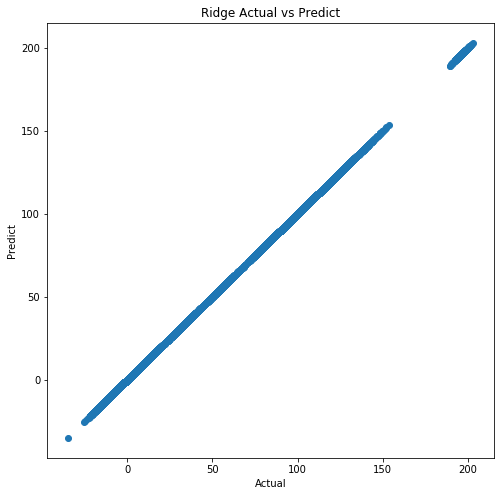

In [20]:
plt.rcParams["figure.figsize"] = (8, 8)
fig, ax = plt.subplots()
ax.scatter(actualtest, ridgepredict)
ax.set(title="Ridge Actual vs Predict")
ax.set(xlabel="Actual", ylabel="Predict");


In [21]:
lassoreg1.score(f_test, t_test)

-2.7362553579111653e-08

In [22]:
lassopredict=lassoreg1.predict(f_test)
lassopredict

array([  1.81762204, -10.64766058,   7.70752607, ...,   1.40307282,
         4.27411517,  -1.58683058])

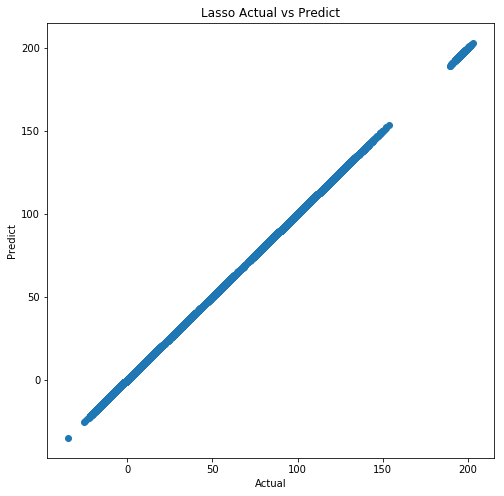

In [23]:
plt.rcParams["figure.figsize"] = (8, 8)
fig, ax = plt.subplots()
ax.scatter(actualtest, lassopredict)
ax.set(title="Lasso Actual vs Predict")
ax.set(xlabel="Actual", ylabel="Predict");

In [24]:
linear.fit(f_train, t_train)
linpredict= linear.predict(f_test)

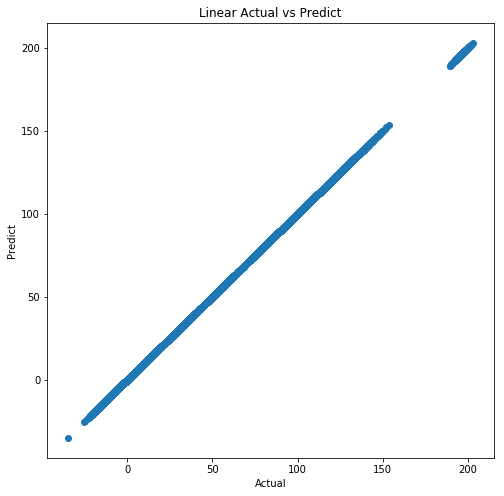

In [25]:
plt.rcParams["figure.figsize"] = (8, 8)
fig, ax = plt.subplots()
ax.scatter(actualtest, linpredict)
ax.set(title="Linear Actual vs Predict")
ax.set(xlabel="Actual", ylabel="Predict");

In [26]:
checkcoef=f_train.columns
checkcoef

Index(['atom_index_0', 'atom_index_1', 'potential_energy', 'X', 'Y', 'Z',
       'XX_atom1', 'YX_atom1', 'ZX_atom1', 'XY_atom1', 'YY_atom1', 'ZY_atom1',
       'XZ_atom1', 'YZ_atom1', 'ZZ_atom1', 'XX', 'YX', 'ZX', 'XY', 'YY', 'ZY',
       'XZ', 'YZ', 'ZZ', 'mulliken_charge_atom1', 'mulliken_charge', 'fc',
       'sd', 'pso', 'dso', 'x_atom1_structure', 'y_atom1_structure',
       'z_atom1_structure', 'x', 'y', 'z'],
      dtype='object')

In [27]:
checkcoef=pd.Series(checkcoef)
checkcoef=checkcoef.rename('Features')
checkcoef
ccdf= pd.DataFrame(checkcoef)
ccdf

,Features
0,atom_index_0
1,atom_index_1
2,potential_energy
3,X
4,Y
5,Z
6,XX_atom1
7,YX_atom1
8,ZX_atom1
9,XY_atom1


In [28]:
linlist=(linear.coef_.tolist())
linlist

[[5.309210823795211e-08,
  1.5284822220407168e-08,
  8.812107142571872e-10,
  -6.030978575341303e-08,
  4.847350111935865e-08,
  5.7361708219917944e-08,
  -4.185361434515661e-08,
  -3.032337324079709e-08,
  7.59772501562432e-08,
  1.7603112804381015e-08,
  -1.534694152150217e-08,
  1.1632499474996741e-07,
  -8.210462860086783e-08,
  -5.19131400038711e-08,
  -5.716156028923127e-09,
  -5.000712531629728e-10,
  5.22589937706087e-09,
  2.127480652599303e-10,
  -1.2365342203081784e-08,
  7.270915296958917e-10,
  9.59809022812774e-09,
  -6.860098004963226e-10,
  -9.85148134449519e-09,
  4.308280963295865e-10,
  6.243656652255963e-07,
  2.1682079930622014e-07,
  0.9999999922707717,
  0.999999512941132,
  1.0000004128245485,
  1.000000423042637,
  2.0129613847542525e-08,
  5.249990653449424e-08,
  -5.542891306801796e-08,
  -7.504443393492686e-08,
  -6.703944907624632e-08,
  -4.388526940288142e-08]]

In [29]:
linseries=pd.Series(linlist)
linseries=linseries.apply(pd.Series).stack().reset_index(drop=True)
linseries= linseries.rename('LinReg')
lindf= pd.DataFrame(linseries)
lindf

,LinReg
0,5.309211e-08
1,1.528482e-08
2,8.812107e-10
3,-6.030979e-08
4,4.847350e-08
5,5.736171e-08
6,-4.185361e-08
7,-3.032337e-08
8,7.597725e-08
9,1.760311e-08


In [30]:
print(linseries)

0     5.309211e-08
1     1.528482e-08
2     8.812107e-10
3    -6.030979e-08
4     4.847350e-08
5     5.736171e-08
6    -4.185361e-08
7    -3.032337e-08
8     7.597725e-08
9     1.760311e-08
10   -1.534694e-08
11    1.163250e-07
12   -8.210463e-08
13   -5.191314e-08
14   -5.716156e-09
15   -5.000713e-10
16    5.225899e-09
17    2.127481e-10
18   -1.236534e-08
19    7.270915e-10
20    9.598090e-09
21   -6.860098e-10
22   -9.851481e-09
23    4.308281e-10
24    6.243657e-07
25    2.168208e-07
26    1.000000e+00
27    9.999995e-01
28    1.000000e+00
29    1.000000e+00
30    2.012961e-08
31    5.249991e-08
32   -5.542891e-08
33   -7.504443e-08
34   -6.703945e-08
35   -4.388527e-08
Name: LinReg, dtype: float64


In [89]:
num= list(range(0,36))
num= pd.DataFrame(num)
num= num.rename(columns={0:'num'})
num

,num
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [90]:
combined= pd.concat([num, ccdf, lindf], axis=1)
combined

,num,Features,LinReg
0,0,atom_index_0,5.309211e-08
1,1,atom_index_1,1.528482e-08
2,2,potential_energy,8.812107e-10
3,3,X,-6.030979e-08
4,4,Y,4.847350e-08
5,5,Z,5.736171e-08
6,6,XX_atom1,-4.185361e-08
7,7,YX_atom1,-3.032337e-08
8,8,ZX_atom1,7.597725e-08
9,9,XY_atom1,1.760311e-08


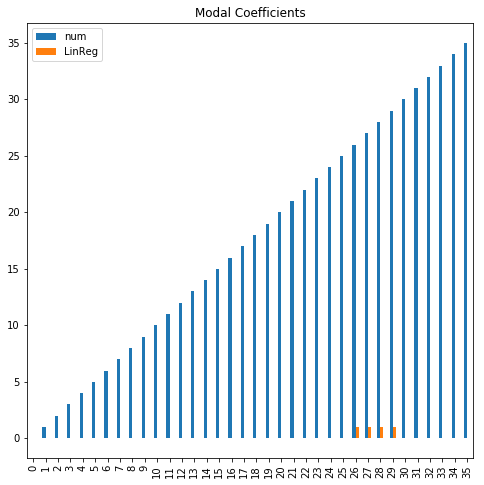

In [91]:
combined.plot(kind='bar',title='Modal Coefficients')

In [35]:
ridgereg1.fit(f_train, t_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 10, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [55]:
r=ridgereg1.best_estimator_

In [56]:
r.coef_

array([[ 5.30921068e-08,  1.52848235e-08,  8.81210318e-10,
        -6.03097853e-08,  4.84735017e-08,  5.73617147e-08,
        -4.18536131e-08, -3.03233741e-08,  7.59772490e-08,
         1.76031132e-08, -1.53469422e-08,  1.16324995e-07,
        -8.21046284e-08, -5.19131395e-08, -5.71615545e-09,
        -5.00070374e-10,  5.22590302e-09,  2.12748161e-10,
        -1.23653385e-08,  7.27091853e-10,  9.59809052e-09,
        -6.86009735e-10, -9.85148094e-09,  4.30828339e-10,
         6.24365744e-07,  2.16821138e-07,  9.99999992e-01,
         9.99999513e-01,  1.00000041e+00,  1.00000042e+00,
         2.01296138e-08,  5.24999069e-08, -5.54289141e-08,
        -7.50444337e-08, -6.70394500e-08, -4.38852701e-08]])

In [57]:
type(r.coef_)

numpy.ndarray

In [58]:
r= (r.coef_.tolist())
r

[[5.3092106846148344e-08,
  1.5284823544596506e-08,
  8.812103176614109e-10,
  -6.030978530961793e-08,
  4.8473501711679614e-08,
  5.736171473629825e-08,
  -4.185361305311911e-08,
  -3.0323374069884916e-08,
  7.59772489741446e-08,
  1.7603113219558185e-08,
  -1.5346942214690407e-08,
  1.1632499468105472e-07,
  -8.210462840143487e-08,
  -5.1913139490009246e-08,
  -5.716155446349761e-09,
  -5.000703736329142e-10,
  5.225903020493133e-09,
  2.127481611011514e-10,
  -1.2365338464416072e-08,
  7.270918528812627e-10,
  9.598090519923002e-09,
  -6.860097353755302e-10,
  -9.85148093715214e-09,
  4.3082833906981653e-10,
  6.243657442147565e-07,
  2.1682113838858214e-07,
  0.9999999922707729,
  0.9999995129410677,
  1.0000004128245146,
  1.000000423042586,
  2.0129613753107245e-08,
  5.2499906933153087e-08,
  -5.54289140638405e-08,
  -7.504443366461562e-08,
  -6.703944995419672e-08,
  -4.388527006651588e-08]]

In [70]:
ridgeseries=pd.Series(r)
ridgeseries=ridgeseries.apply(pd.Series).stack().reset_index(drop=True)
ridgeseries= ridgeseries.rename('RidgeReg')
ridgedf= pd.DataFrame(ridgeseries)
ridgedf

,RidgeReg
0,5.309211e-08
1,1.528482e-08
2,8.812103e-10
3,-6.030979e-08
4,4.847350e-08
5,5.736171e-08
6,-4.185361e-08
7,-3.032337e-08
8,7.597725e-08
9,1.760311e-08


In [92]:
rcombined= pd.concat([num, ccdf, ridgedf], axis=1)
rcombined

,num,Features,RidgeReg
0,0,atom_index_0,5.309211e-08
1,1,atom_index_1,1.528482e-08
2,2,potential_energy,8.812103e-10
3,3,X,-6.030979e-08
4,4,Y,4.847350e-08
5,5,Z,5.736171e-08
6,6,XX_atom1,-4.185361e-08
7,7,YX_atom1,-3.032337e-08
8,8,ZX_atom1,7.597725e-08
9,9,XY_atom1,1.760311e-08


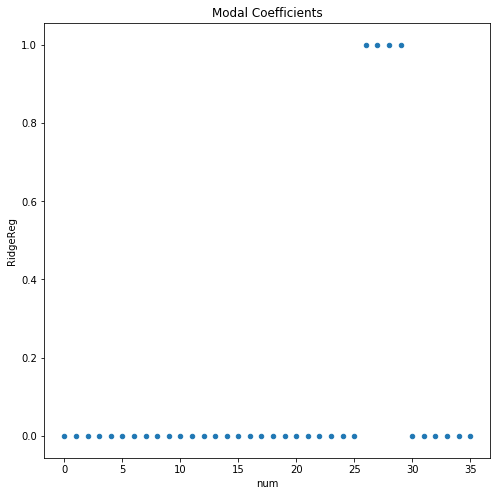

In [102]:
rcombined.plot(kind='scatter', x='num', y='RidgeReg', title='Modal Coefficients')

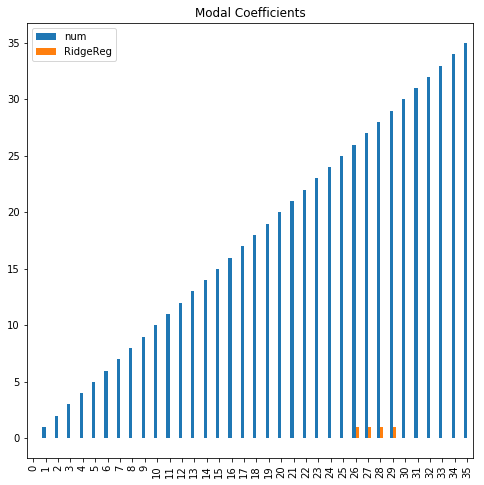

In [94]:
rcombined.plot(kind='bar', title='Modal Coefficients')

In [95]:
lassoreg1.fit(f_train, t_train)
l= lassoreg1.best_estimator_
l.coef_

array([-4.81758374e-06,  5.98649334e-06, -1.83223442e-07, -2.05050275e-07,
        3.86118346e-07,  1.46669600e-06,  9.00041764e-06, -2.05957351e-07,
       -2.99824070e-08,  4.01206658e-07,  1.00588031e-05,  2.85051019e-07,
        1.56256560e-08, -1.84187153e-07,  1.04314227e-05,  2.22701850e-07,
        2.53338888e-08,  2.21899359e-08, -4.60566346e-08,  2.75883829e-07,
       -1.02191133e-07, -3.92373716e-08,  5.32703516e-08,  3.48469070e-07,
        2.59612281e-04, -3.03136042e-05,  1.00000447e+00,  1.00049244e+00,
        9.99574591e-01,  9.99667820e-01,  1.42185889e-07, -9.00230994e-06,
        5.35644557e-07, -7.25593864e-07,  9.28199139e-06, -8.00535686e-07])

In [96]:
l= (l.coef_.tolist())
l

[-4.817583738356287e-06,
 5.9864933358468375e-06,
 -1.8322344200251578e-07,
 -2.0505027548157247e-07,
 3.861183457840272e-07,
 1.4666959976239385e-06,
 9.000417644115743e-06,
 -2.0595735087821815e-07,
 -2.998240698884313e-08,
 4.01206657602271e-07,
 1.0058803111705762e-05,
 2.8505101868272996e-07,
 1.5625655985549816e-08,
 -1.8418715320096905e-07,
 1.0431422695660634e-05,
 2.2270184978389925e-07,
 2.5333888830775312e-08,
 2.218993592500918e-08,
 -4.605663463531518e-08,
 2.758838293383352e-07,
 -1.0219113327355955e-07,
 -3.923737155030868e-08,
 5.327035162896665e-08,
 3.4846906974754724e-07,
 0.000259612281025735,
 -3.031360415544923e-05,
 1.0000044712548348,
 1.000492441489657,
 0.9995745911954242,
 0.9996678201352719,
 1.4218588935049288e-07,
 -9.002309938286878e-06,
 5.356445568587577e-07,
 -7.255938638137277e-07,
 9.281991394836598e-06,
 -8.005356858173819e-07]

In [97]:
lassoseries=pd.Series(l)
lassoseries=lassoseries.apply(pd.Series).stack().reset_index(drop=True)
lassoseries= lassoseries.rename('LassoReg')
lassodf= pd.DataFrame(lassoseries)
lassodf

,LassoReg
0,-4.817584e-06
1,5.986493e-06
2,-1.832234e-07
3,-2.050503e-07
4,3.861183e-07
5,1.466696e-06
6,9.000418e-06
7,-2.059574e-07
8,-2.998241e-08
9,4.012067e-07


In [98]:
lcombined= pd.concat([num, ccdf, lassodf], axis=1)
lcombined

,num,Features,LassoReg
0,0,atom_index_0,-4.817584e-06
1,1,atom_index_1,5.986493e-06
2,2,potential_energy,-1.832234e-07
3,3,X,-2.050503e-07
4,4,Y,3.861183e-07
5,5,Z,1.466696e-06
6,6,XX_atom1,9.000418e-06
7,7,YX_atom1,-2.059574e-07
8,8,ZX_atom1,-2.998241e-08
9,9,XY_atom1,4.012067e-07


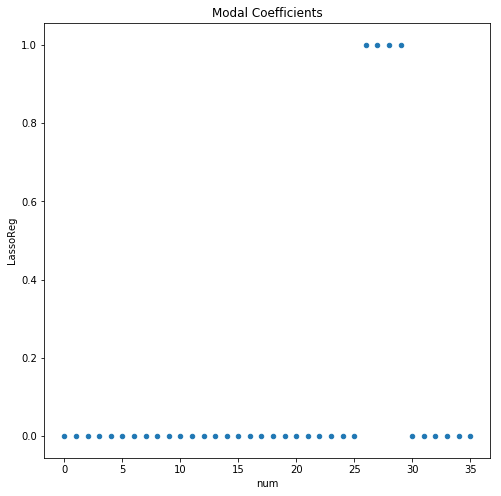

In [99]:
lcombined.plot(kind='scatter', x='num', y='LassoReg', title='Modal Coefficients')

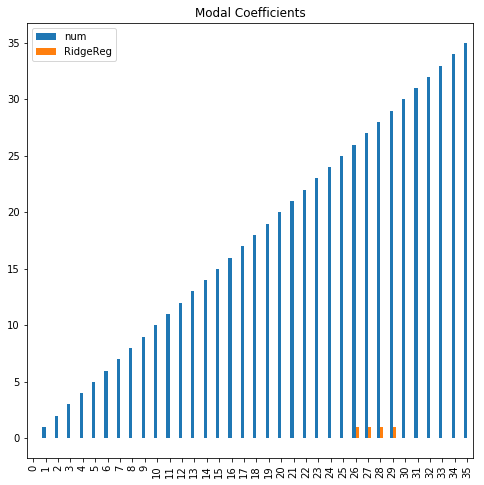

In [101]:
rcombined.plot(kind='bar',  title='Modal Coefficients')